# Supervised Learning. Classification: Class imbalance

### Load libraries

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

Dataset can be found in [Kaggle](#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) 

The target variable **Diabetes_binary** has 2 classes. 
* 0 is for no diabetes, 
* 1 is for prediabetes or diabetes. 


This dataset has 21 feature variables and is not balanced.


In [2]:
data = pd.read_csv('Data/S4_diabetes_desequilibrio_clases.csv')
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

How many data we have?

In [3]:
data.shape

(253680, 22)

Let's check more info about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### What represents each column?

**(LABEL) Diabetes_binary:** Description: Indicates whether an individual has diabetes (1) or not (0). This is likely the target or outcome variable of the dataset.


**HighBP:** Indicates if the person has high blood pressure (1) or not (0).


**HighChol:** Indicates if the individual has high cholesterol levels (1) or not (0).

**CholCheck:** Whether the individual has had their cholesterol checked (1) in the last 5 years or not (0).

**BMI:** The individual’s Body Mass Index (BMI), a measure of body fat based on height and weight.

**Smoker:** Indicates whether the individual is a smoker (1) or not (0).


**Stroke:** Indicates if the individual has had a stroke (1) or not (0).


**HeartDiseaseorAttack:** Whether the individual has had coronary heart disease or myocardial infarction (1) or not (0).

**PhysActivity:** Indicates if the individual has engaged in physical activity or exercise in the last 30 days - not including job (1) or not (0).


**Fruits:** Indicates whether the individual consumes 1 fruit or more daily (1) or not (0).


**Veggies:** Indicates whether the individual consumes 1 vegetable or more daily (1) or not (0).

**HeavyAlcoholCons:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (1) or not (0)

**AnyHealthcare:** Indicates whether the person has access to any form of healthcare coverage (1) or not (0).

**NoDocbcCost:** Whether the person could not visit a doctor in the past year due to cost (1) or not (0).

**GenHlth:** Self-reported general health status, where lower values (1) indicate better health (e.g., excellent) and higher values (5) indicate worse health (e.g., poor).

**MentHlth:** Number of days in the past 30 days that the individual experienced poor mental health (stress, depression, and problems with emotions).

**PhysHlth:** Number of days in the past 30 days that the individual experienced poor physical health (physical illness and injury).

**DiffWalk:** Indicates whether the individual has difficulty walking or climbing stairs (1) or not (0).


**Sex:** Gender of the individual, 0 = female; 1 = male.

**Age:** Represents age group categories. 13-level age category. 
* 1: 18-24 years old
* 2: 25-29 years old
* ...
* 13: 80 years or older

**Education:** Represents the highest level of education attained. 
* 1: Never attended school
* 2: Elementary school
* ...
* 6: College graduate.

**Income:** Represents income categories. Scale 1-8

* 1: Less than 10 000 
* 2: 10 000 to 14 999
* ...
* 8: 75 000 or more.

Show some statistic summary of the data

In [5]:
data.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

### Since this is a binary classification problem, we need to know if there is a class imbalance.

In [6]:
data['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

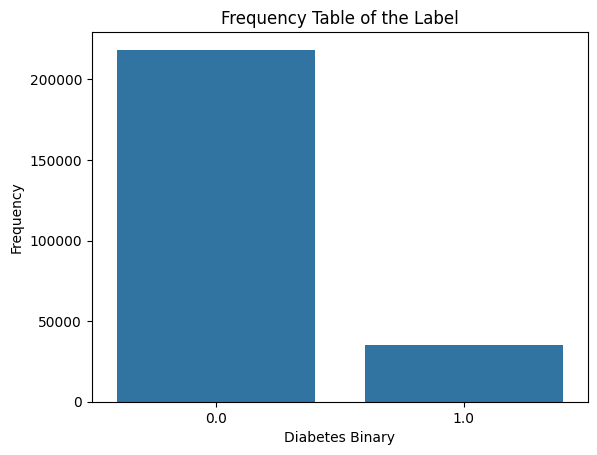

Total number of labels:  253680


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


x = data['Diabetes_binary'].value_counts().values
labels = data['Diabetes_binary'].value_counts().index

# Use the correct syntax for barplot
sns.barplot(x=labels, y=x)
plt.title('Frequency Table of the Label')
plt.xlabel('Diabetes Binary')
plt.ylabel('Frequency')
plt.show()

# Print the total number of labels
print('Total number of labels: ', sum(x))



<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Exercise 1</span>
<p style="color:black">What's the percentage of the minor class?</p>
    </div>

In [ ]:

# write your code here







It is evident that there is a class imbalance problem. Now, we will study the methods to address this problem.

# **Methods to handle imbalance datasets**: 
* Resampling: 
    * Oversampling
    * Undersampling
    
* Oversampling with synthetic data 
* Using class weight in model training
* Change classification evaluation metric to identify class imbalance

## 1. Resampling 


`sklearn.utils.resample(*arrays, replace=True, n_samples=None, random_state=None, stratify=None)`

[Scikit learn documentation](#https://scikit-learn.org/1.5/modules/generated/sklearn.utils.resample.html)


A widely adopted technique for dealing with highly imbalanced datasets is called resampling. It involves removing samples from the majority class (undersampling) and/or adding more examples from the minority class (oversampling).

<img src="Figures/resampling.png" alt="Drawing" style="width: 800px;"/>



### **1.1 Random Oversampling the Minority Class**

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good option when there isn't a lot of data to work with.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

In [10]:
from sklearn.utils import resample

no_diabetes_majority_class = data[data["Diabetes_binary"] == 0]
diabetes_minority_class = data[data["Diabetes_binary"] == 1]

# upsample minority
diabetes_minority_class_upsampled = resample(diabetes_minority_class,
                          replace=True, # This has to be set True when upsampling
                          n_samples=len(no_diabetes_majority_class), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_randomoversampling = pd.concat([no_diabetes_majority_class, diabetes_minority_class_upsampled])

In [11]:
upsampled_randomoversampling

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
202672              1.0     1.0       0.0        1.0  23.0     1.0     0.0   
58011               1.0     1.0       0.0        1.0  27.0     1.0     0.0   
195556              1.0     1.0       1.0        1.0  25.0     1.0     1.0   
145396              1.0     1.0       1.0        1.0  52.0     1.0     0.0   
236240              1.0     1.0       1.0        1.0  27.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
202672                   0.0           1.0     1.0  ...            1.0   
58011                    0.0           1.0     0.0  ...            1.0   
195556                   1.0           0.0     0.0  ...            1.0   
145396                   0.0           0.0     0.0  ...            1.0   
236240                   1.0           1.0     0.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
202672          0.0      2.0       0.0       0.0       0.0  0.0  11.0   
58011           0.0      4.0       0.0      24.0       0.0  0.0  13.0   
195556          0.0      5.0       5.0      30.0       1.0  1.0  10.0   
145396          0.0      3.0       0.0       0.0       1.0  0.0   9.0   
236240          0.0      3.0       0.0       0.0       0.0  1.0  13.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
202672        6.0     5.0  
58011         5.0     4.0  
195556        5.0     6.0  
145396        6.0     8.0  
236240        5.0     4.0  

[436668 rows x 22 columns]

###  Plot the Frequency table

Now, let's use the Seaborn library palette. 

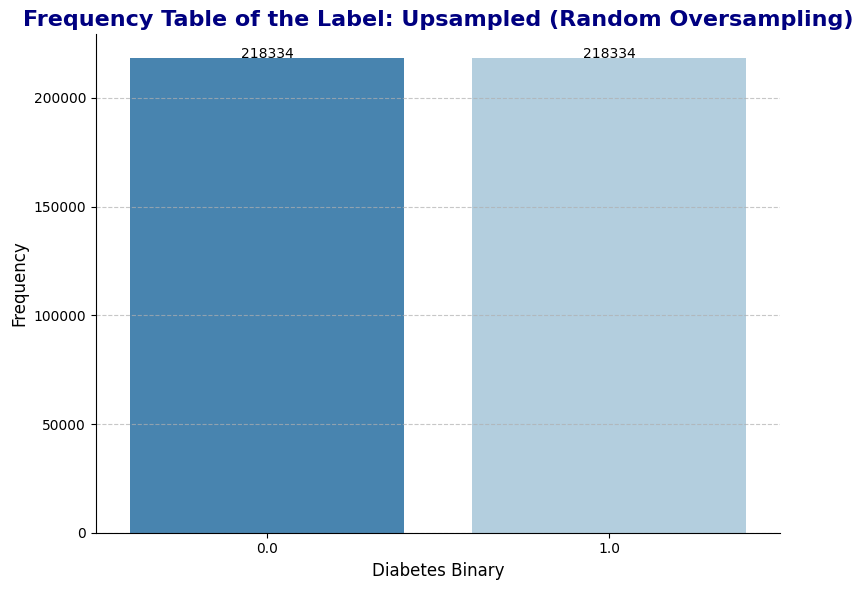

Total number of labels:  [218334 218334]


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


x = upsampled_randomoversampling['Diabetes_binary'].value_counts().values
labels = upsampled_randomoversampling['Diabetes_binary'].value_counts().index

# Define a color palette
palette = sns.color_palette("Blues_r", len(labels))

# Create the barplot 
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=x, palette=palette)

# Add titles and labels with font customizations
plt.title('Frequency Table of the Label: Upsampled (Random Oversampling)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Diabetes Binary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add value annotations on top of the bars
for i in range(len(x)):
    plt.text(i, x[i] + 200, str(x[i]), ha='center', fontsize=10, color='black')

# Customize grid and aesthetics
sns.despine(top=True, right=True, left=False, bottom=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

print('Total number of labels: ', x)

### **1.2 Random  Undersampling the Majority Class**

Undersampling can be defined as the removal of some observations from the majority class. Undersampling can be a good option when there is a large amount of data available, for example, millions of rows. However, the downside is that we are eliminating information that could be valuable. This could lead to underfitting and poor generalization on the test set.


In [13]:
# Similar to upsampling
no_diabetes_majority_class = data[data["Diabetes_binary"] == 0]
diabetes_minority_class = data[data["Diabetes_binary"] == 1]


no_diabetes_majority_class_downsampled = resample(no_diabetes_majority_class,
                                replace = False, # sample without replacement
                                n_samples = len(diabetes_minority_class), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled_randomsampling = pd.concat([no_diabetes_majority_class_downsampled, diabetes_minority_class])

# checking counts
downsampled_randomsampling.Diabetes_binary.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

Total number of labels:  [35346 35346]


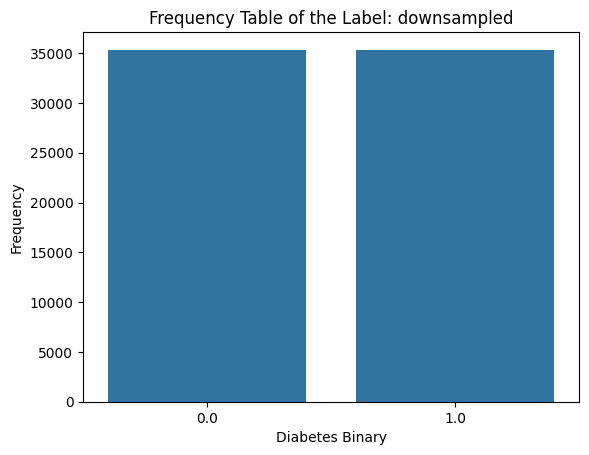

In [14]:


x = downsampled_randomsampling['Diabetes_binary'].value_counts().values
labels = downsampled_randomsampling['Diabetes_binary'].value_counts().index


sns.barplot(x=labels, y=x)
plt.title('Frequency Table of the Label: downsampled')
plt.xlabel('Diabetes Binary')
plt.ylabel('Frequency')

print('Total number of labels: ', x)

## 2. Synthetic Data

Several more sophisticated resampling techniques have been proposed in the literature.

For example, in oversampling, instead of creating exact copies of records from the minority class, we can introduce small variations in those copies, creating more diverse synthetic samples.

We are going to apply this resampling technique (creation of synthetic data) using the **[imbalanced-learn](https://imbalanced-learn.org/stable/)** Python library. It is compatible with scikit-learn and is part of the scikit-learn-contrib projects.

### Over-sampling: SMOTE

**Synthetic Minority Oversampling Technique (SMOTE)** 

SMOTE is a more sophisticated technique than random oversampling. It generates synthetic samples for the minority class by interpolating between existing samples.

<img src="Figures/SMOTE.png" alt="Drawing" style="width: 400px"/>


In [ ]:
# if you have not installed imblearn, run the line below

# !pip install imblearn

In [15]:
from imblearn.over_sampling import SMOTE

# Let's separate the features from the target column.
X = data.drop('Diabetes_binary', axis=1)  # Features (all columns except target)
y = data['Diabetes_binary']  # Target column (Diabetes_binary)

# Apply SMOTE to upsample the minority class
smote = SMOTE(random_state=27)  # Initializes the SMOTE oversampler with a random seed for reproducibility.
X_smote, y_smote = smote.fit_resample(X, y)  #  Applies SMOTE to balance the minority class by generating synthetic samples.

# Combine X_smote and y_smote into a new DataFrame
upsampled_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['Diabetes_binary'])], axis=1)

# Display the balanced dataset
print(upsampled_smote['Diabetes_binary'].value_counts())

  File "c:\Users\vilde\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Diabetes_binary
0.0    218334
1.0    218334
Name: count, dtype: int64


In [16]:
upsampled_smote

HighBP  HighChol  CholCheck        BMI  Smoker  Stroke  \
0          1.0  1.000000        1.0  40.000000     1.0     0.0   
1          0.0  0.000000        0.0  25.000000     1.0     0.0   
2          1.0  1.000000        1.0  28.000000     0.0     0.0   
3          1.0  0.000000        1.0  27.000000     0.0     0.0   
4          1.0  1.000000        1.0  24.000000     0.0     0.0   
...        ...       ...        ...        ...     ...     ...   
436663     1.0  1.000000        1.0  36.513670     1.0     0.0   
436664     1.0  1.000000        1.0  28.806780     0.0     0.0   
436665     0.0  1.000000        1.0  27.000000     0.0     0.0   
436666     0.0  0.000000        1.0  34.769556     0.0     0.0   
436667     1.0  0.022992        1.0  35.022992     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity    Fruits  Veggies  ...  \
0                   0.000000      0.000000  0.000000  1.00000  ...   
1                   0.000000      1.000000  0.000000  0.00000  ...   
2                   0.000000      0.000000  1.000000  0.00000  ...   
3                   0.000000      1.000000  1.000000  1.00000  ...   
4                   0.000000      1.000000  1.000000  1.00000  ...   
...                      ...           ...       ...      ...  ...   
436663              1.000000      0.000000  0.000000  0.48633  ...   
436664              0.000000      0.000000  1.000000  1.00000  ...   
436665              0.000000      1.000000  0.000000  1.00000  ...   
436666              0.769556      0.000000  1.000000  0.00000  ...   
436667              0.000000      0.977008  0.977008  1.00000  ...   

        NoDocbcCost   GenHlth  MentHlth   PhysHlth  DiffWalk      Sex  \
0           0.00000  5.000000      18.0  15.000000       1.0  0.00000   
1           1.00000  3.000000       0.0   0.000000       0.0  0.00000   
2           1.00000  5.000000      30.0  30.000000       1.0  0.00000   
3           0.00000  2.000000       0.0   0.000000       0.0  0.00000   
4           0.00000  2.000000       3.0   0.000000       0.0  0.00000   
...             ...       ...       ...        ...       ...      ...   
436663      0.00000  4.000000      30.0  30.000000       1.0  0.51367   
436664      0.19322  4.193220       0.0  30.000000       0.0  0.00000   
436665      0.00000  3.000000       0.0   3.019238       0.0  0.00000   
436666      0.00000  2.000000       0.0   0.000000       0.0  1.00000   
436667      0.00000  3.022992       0.0   2.000000       0.0  1.00000   

              Age  Education    Income  Diabetes_binary  
0        9.000000   4.000000  3.000000              0.0  
1        7.000000   6.000000  1.000000              0.0  
2        9.000000   4.000000  8.000000              0.0  
3       11.000000   3.000000  6.000000              0.0  
4       11.000000   5.000000  4.000000              0.0  
...           ...        ...       ...              ...  
436663  10.000000   2.513670  1.513670              1.0  
436664  11.000000   5.000000  3.806780              1.0  
436665  10.019238   6.000000  7.980762              1.0  
436666  10.769556   5.230444  6.000000              1.0  
436667   7.000000   6.000000  8.000000              1.0  

[436668 rows x 22 columns]

In [17]:
upsampled_smote.describe()

HighBP       HighChol      CholCheck            BMI  \
count  436668.000000  436668.000000  436668.000000  436668.000000   
mean        0.573102       0.535507       0.976265      29.887034   
std         0.479713       0.480642       0.150031       7.123258   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      25.000000   
50%         1.000000       0.834501       1.000000      29.000000   
75%         1.000000       1.000000       1.000000      33.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  436668.000000  436668.000000         436668.000000  436668.000000   
mean        0.474263       0.056140              0.140667       0.710047   
std         0.479073       0.212261              0.326360       0.432521   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       0.146816   
50%         0.283785       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  ...    NoDocbcCost        GenHlth  \
count  436668.000000  436668.000000  ...  436668.000000  436668.000000   
mean        0.619419       0.797325  ...       0.087481       2.838580   
std         0.464770       0.381760  ...       0.266123       1.084731   
min         0.000000       0.000000  ...       0.000000       1.000000   
25%         0.000000       0.995895  ...       0.000000       2.000000   
50%         1.000000       1.000000  ...       0.000000       3.000000   
75%         1.000000       1.000000  ...       0.000000       3.738079   
max         1.000000       1.000000  ...       1.000000       5.000000   

            MentHlth       PhysHlth       DiffWalk            Sex  \
count  436668.000000  436668.000000  436668.000000  436668.000000   
mean        3.707394       5.789063       0.248454       0.454614   
std         8.125174      10.064004       0.414725       0.478672   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.097984   
75%         2.000000       5.286642       0.482319       1.000000   
max        30.000000      30.000000       1.000000       1.000000   

                 Age      Education         Income  Diabetes_binary  
count  436668.000000  436668.000000  436668.000000    436668.000000  
mean        8.604235       4.930410       5.707401         0.500000  
std         2.821292       0.992327       2.153175         0.500001  
min         1.000000       1.000000       1.000000         0.000000  
25%         7.000000       4.000000       4.000000         0.000000  
50%         9.000000       5.000000       6.000000         0.500000  
75%        11.000000       6.000000       8.000000         1.000000  
max        13.000000       6.000000       8.000000         1.000000  

[8 rows x 22 columns]

## 3. Using algorithms with Class Weights

Many Scikit-learn classifiers support the class_weight parameter to help deal with class imbalance:

* Logistic Regression: ``LogisticRegression(class_weight='balanced')``
* Decision Trees: ``DecisionTreeClassifier(class_weight='balanced')``
* Random Forest: ``RandomForestClassifier(class_weight='balanced')``
* Support Vector Machines: `SVC(class_weight='balanced')`
* Gradient Boosting: `GradientBoostingClassifier(class_weight='balanced')`

### Train the model using the ML classification models 

### But first, let's build a simple classification model using the original dataset, without random sampling or ``class_weight='balanced'``

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# load again the dataset
data = pd.read_csv('data/S4_diabetes_desequilibrio_clases.csv')

X = data.iloc[:,1:]
y = data["Diabetes_binary"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)



In [19]:
X_train

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
51457      1.0       1.0        1.0  35.0     0.0     0.0   
104586     1.0       1.0        1.0  37.0     1.0     0.0   
135715     0.0       0.0        1.0  28.0     0.0     0.0   
229271     0.0       0.0        1.0  23.0     0.0     0.0   
107891     0.0       0.0        1.0  30.0     1.0     0.0   
...        ...       ...        ...   ...     ...     ...   
119879     1.0       0.0        1.0  45.0     1.0     0.0   
103694     1.0       1.0        1.0  29.0     1.0     0.0   
131932     0.0       1.0        1.0  25.0     0.0     0.0   
146867     0.0       0.0        0.0  23.0     0.0     0.0   
121958     1.0       0.0        1.0  35.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
51457                    0.0           1.0     1.0      1.0  ...   
104586                   0.0           1.0     1.0      1.0  ...   
135715                   0.0           1.0     1.0      1.0  ...   
229271                   0.0           1.0     1.0      1.0  ...   
107891                   0.0           1.0     0.0      1.0  ...   
...                      ...           ...     ...      ...  ...   
119879                   0.0           1.0     1.0      0.0  ...   
103694                   0.0           1.0     0.0      1.0  ...   
131932                   0.0           1.0     1.0      1.0  ...   
146867                   0.0           0.0     1.0      1.0  ...   
121958                   0.0           0.0     1.0      1.0  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
51457             1.0          0.0      5.0       0.0      14.0       1.0   
104586            1.0          0.0      3.0       0.0       2.0       0.0   
135715            1.0          0.0      2.0       0.0       0.0       0.0   
229271            1.0          0.0      3.0       0.0       0.0       0.0   
107891            1.0          0.0      2.0       0.0       5.0       0.0   
...               ...          ...      ...       ...       ...       ...   
119879            1.0          1.0      1.0      15.0       0.0       0.0   
103694            1.0          0.0      3.0       0.0       0.0       0.0   
131932            1.0          0.0      2.0       0.0       3.0       0.0   
146867            1.0          1.0      2.0       0.0       0.0       0.0   
121958            1.0          0.0      3.0      15.0       0.0       1.0   

        Sex   Age  Education  Income  
51457   0.0  12.0        3.0     1.0  
104586  1.0  11.0        5.0     3.0  
135715  0.0   5.0        6.0     8.0  
229271  1.0   2.0        6.0     8.0  
107891  1.0   7.0        4.0     7.0  
...     ...   ...        ...     ...  
119879  0.0   5.0        4.0     1.0  
103694  1.0  11.0        6.0     7.0  
131932  0.0   9.0        6.0     8.0  
146867  0.0   5.0        6.0     6.0  
121958  0.0  11.0        5.0     6.0  

[177576 rows x 21 columns]

In [20]:
y_train

51457     1.0
104586    0.0
135715    0.0
229271    0.0
107891    0.0
         ... 
119879    0.0
103694    0.0
131932    0.0
146867    0.0
121958    1.0
Name: Diabetes_binary, Length: 177576, dtype: float64

In [21]:
X_test.shape

(76104, 21)

In [22]:
y_test.shape

(76104,)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)
acc_lg =  accuracy_score(y_test, y_pred_logreg)

# Evaluation
print("Logistic Regression Accuracy: ", acc_lg)

Logistic Regression Accuracy:  0.8641727110270156


###  Support Vector Classifier (SVC)

In [24]:
from sklearn.svm import SVC

# SVC
svc = SVC(kernel = 'linear', random_state=42, shrinking =True, verbose=True, tol=0.1, max_iter=100)
svc.fit(X_train, y_train)

# Predictions
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
# Evaluation
print("SVC Accuracy: ", acc_svc)

[LibSVM]SVC Accuracy:  0.8522679491222538


### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_tree)
# Evaluation
print("Decision Tree Accuracy: ", acc_dt)

Decision Tree Accuracy:  0.798131504257332


### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_forest = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_forest)
# Evaluation
print("Random Forest Accuracy: ", acc_rf)

Random Forest Accuracy:  0.8601781772311574


### K-Nearest Neighbors (KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Convert X_train and X_test to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_np, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_np)

acc_knn = accuracy_score(y_test, y_pred_knn)

# Evaluation
print("KNN Accuracy: ", acc_knn)

KNN Accuracy:  0.8529906443813728


### First approach results

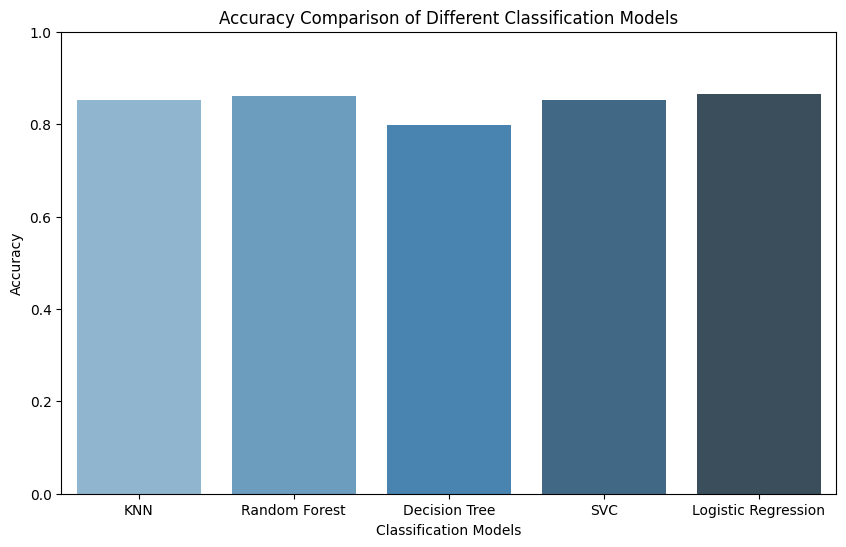

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a DataFrame with the results
accuracy_data = {
    "Model": ["KNN", "Random Forest", "Decision Tree", "SVC", "Logistic Regression"],
    "Accuracy": [acc_knn, acc_rf, acc_dt, acc_svc, acc_lg]
}

accuracy_df = pd.DataFrame(accuracy_data)  # Seaborn library expects a dataframe as input

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="Blues_d")
plt.title('Accuracy Comparison of Different Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1 for better visualization
plt.show()



<div style="background-color:#ffffaa; padding:10px; border-radius:5px;">

### <span style="color:blue">(Optional to practice) </span>
Add more ensemble models and compare
    </div>


<div style="background-color:#ffffaa; padding:10px; border-radius:5px;">

### <span style="color:blue">(Optional to practice) </span>
Run all these examples again, but with the class_weight='balanced'. Are the results better?
    </div>

## 4. With imbalance classes, we need to check more Evaluation Metrics.

As we have seen above, accuracy is not the best metric for evaluating unbalanced data sets, as it can be misleading. Metrics that can provide better insight include:

**Confusion matrix**: a table showing correct predictions and types of incorrect predictions.

* **Accuracy**: the number of true positives divided by all positive predictions. Precision is also called positive predictive value. It is a measure of the accuracy of a classifier. A low precision indicates a high number of false positives.

* **Recall**: the number of true positives divided by the number of positive values in the test data, also called sensitivity or true positive rate. It is a measure of the completeness of a classifier. A low recall indicates a high number of false negatives.

* **F1 score**: the weighted average of precision and recall.




**Precision for Class 1 (Diabetes):**
* Precision tells us how many of the instances predicted as diabetes (class 1) are actually diabetic.
* For isntance, if precision for class 1 is 0.42, this means that when the model predicts someone has diabetes, it is correct 42% of the time. The remaining 58% of the predictions are false positives (people without diabetes incorrectly predicted as having diabetes).

**Recall for Class 1 (Diabetes):**
* Recall (also known as sensitivity or true positive rate) measures how many of the actual diabetic cases were correctly identified by the model.
* Recall for class 1 is 0.17, meaning that the model correctly identifies only 17% of the people who actually have diabetes.

**F1-Score for Class 1 (Diabetes):**
* The F1-score is the harmonic mean of precision and recall, combining both into a single metric. It balances the two metrics, making it useful when the data is imbalanced, as is the case here.


In [30]:
from sklearn.metrics import confusion_matrix


# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_pred, y_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Predicted Label')
    plt.xlabel('Actual Label')
    plt.show()

### Logistic Regression

Logistic Regression Accuracy:  0.8641727110270156
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.53      0.13      0.21     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.57     76104
weighted avg       0.83      0.86      0.83     76104

[[64414  1191]
 [ 9146  1353]]


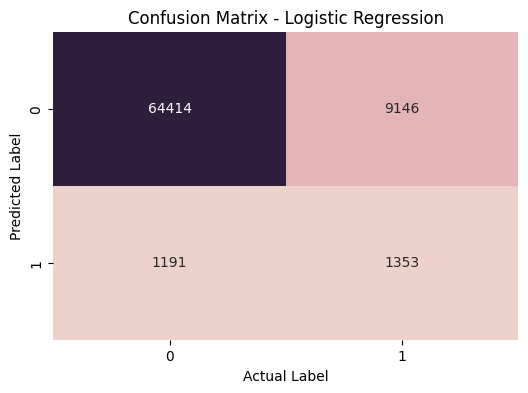

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('data/S4_diabetes_desequilibrio_clases.csv')

X = data.iloc[:,1:]
y = data["Diabetes_binary"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)


# Evaluation
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")


###  Support Vector Classifier (SVC)

[LibSVM]SVC Accuracy:  0.8522679491222538
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     65605
         1.0       0.35      0.08      0.14     10499

    accuracy                           0.85     76104
   macro avg       0.61      0.53      0.53     76104
weighted avg       0.80      0.85      0.81     76104

[[63971  1634]
 [ 9609   890]]


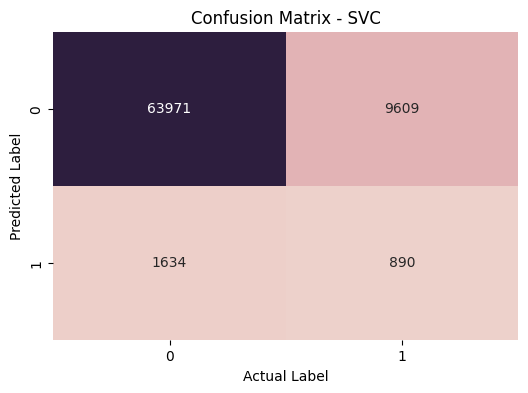

In [32]:
from sklearn.svm import SVC

# SVC
svc = SVC(kernel = 'linear', random_state=42, shrinking =True, verbose=True, tol=0.1, max_iter=100)
svc.fit(X_train, y_train)

# Predictions
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)

# Evaluation
print("SVC Accuracy: ", acc_svc)
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
plot_confusion_matrix(y_test, y_pred_svc, "SVC")


### Decision Tree Classifier

Decision Tree Accuracy:  0.798131504257332
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     65605
         1.0       0.29      0.33      0.31     10499

    accuracy                           0.80     76104
   macro avg       0.59      0.60      0.60     76104
weighted avg       0.81      0.80      0.80     76104

[[57284  8321]
 [ 7042  3457]]


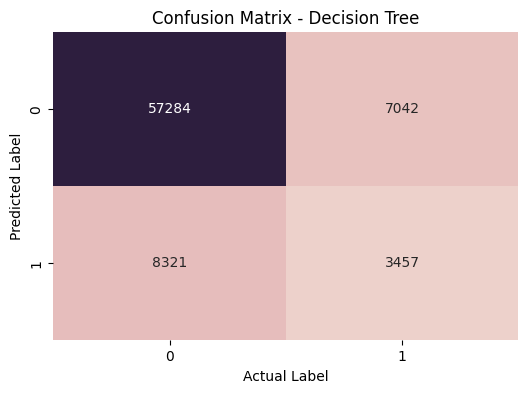

In [33]:
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('data/S4_diabetes_desequilibrio_clases.csv')


X = data.iloc[:,1:]
y = data["Diabetes_binary"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)


# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree = decision_tree.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_tree)


# Evaluation
print("Decision Tree Accuracy: ", acc_dt)
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")


With decision trees and random forest, we can see the real tree

Visualize decision tree in different ways [source](#https://mljar.com/blog/visualize-decision-tree/)

In [34]:
from sklearn.tree import export_text

# Textual representation of the decision tree
text_representation = export_text(decision_tree, feature_names=X.columns.tolist())
print(text_representation)

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 31.50
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- BMI <= 27.50
|   |   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |   |--- Income <= 2.50
|   |   |   |   |   |   |   |   |--- HeartDiseaseorAttack <= 0.50
|   |   |   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 22.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- BMI >  22.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |   |   |--- Education <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- Education >  4.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- HeartDisea

### Random Forest Classifier

Not too complex random forest to plot the tree in a reasonable time

Random Forest Accuracy:  0.8634631556816987
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     65605
         1.0       0.67      0.02      0.04     10499

    accuracy                           0.86     76104
   macro avg       0.77      0.51      0.48     76104
weighted avg       0.84      0.86      0.80     76104

[[65497   108]
 [10283   216]]


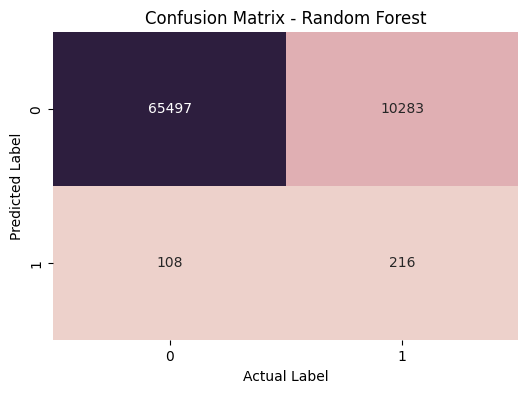

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('data/S4_diabetes_desequilibrio_clases.csv')

X = data.iloc[:,1:]
y = data["Diabetes_binary"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)



# Random Forest
random_forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_forest = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_forest)

# Evaluation
print("Random Forest Accuracy: ", acc_rf)
print(classification_report(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))
plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")


### Plot the tree

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Extract one tree from the Random Forest
estimator = random_forest.estimators_[0]

# Convert feature names to a list
feature_names = X.columns.tolist()


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,10), dpi=800)
tree.plot_tree(estimator,
               feature_names = feature_names, 
               class_names=["No Diabetes", "Diabetes"],
               filled = True);
fig.savefig('rf_individualtree.png')

## Which are the most relevant features for this model?

In [37]:
# Calculate feature importances
importances = random_forest.feature_importances_
feature_names = X.columns.tolist()


# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

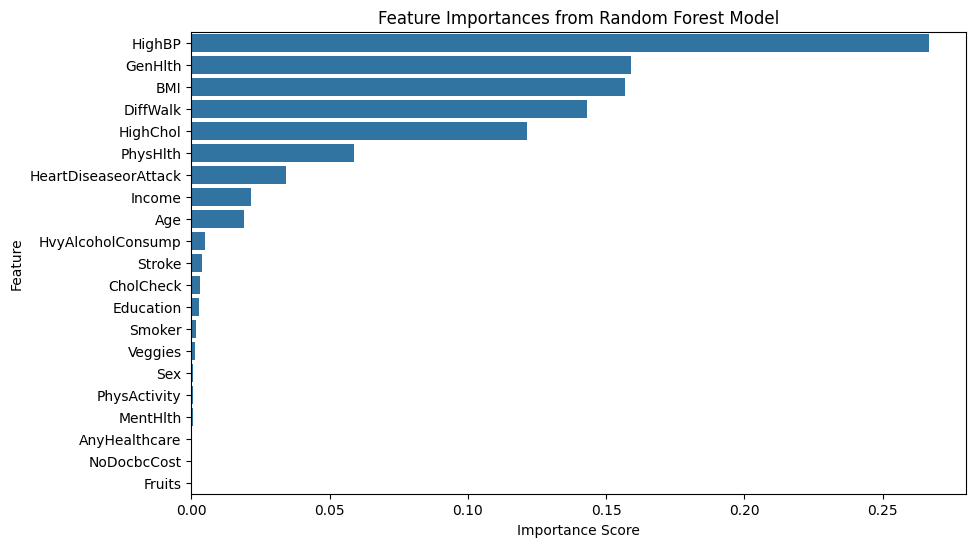

Most Relevant Features:
                 Feature  Importance
0                 HighBP    0.266950
13               GenHlth    0.158929
3                    BMI    0.156743
16              DiffWalk    0.142945
1               HighChol    0.121398
15              PhysHlth    0.058698
6   HeartDiseaseorAttack    0.034078
20                Income    0.021450
18                   Age    0.018900
10     HvyAlcoholConsump    0.005040


In [38]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print the most relevant features
print("Most Relevant Features:")
print(feature_importance_df.head(10))  # Show top 10 features

### K-Nearest Neighbors (KNN)

KNN Accuracy:  0.8529906443813728
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     65605
         1.0       0.42      0.17      0.24     10499

    accuracy                           0.85     76104
   macro avg       0.65      0.57      0.58     76104
weighted avg       0.82      0.85      0.82     76104

[[63151  2454]
 [ 8734  1765]]


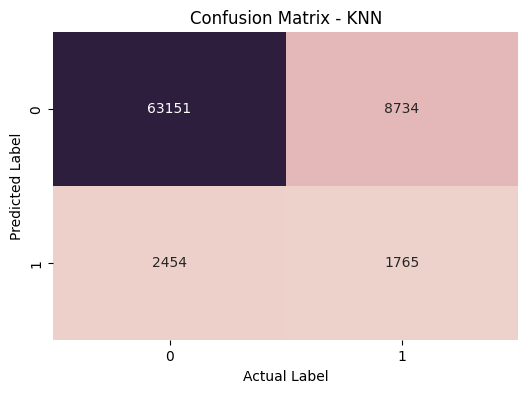

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Convert X_train and X_test to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_np, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_np)

acc_knn = accuracy_score(y_test, y_pred_knn)

# Evaluation
print("KNN Accuracy: ", acc_knn)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
plot_confusion_matrix(y_test, y_pred_knn, "KNN")




<div style="background-color:#ccffcc; padding:10px; border-radius:5px;">

### <span style="color:blue">Question</span>
<p style="color: black">Which model performs best?</p>
    </div>

## Matthews Correlation Coefficient (MCC)

The **Matthews Correlation Coefficient (MCC)** is a metric used to evaluate the quality of binary classifications, particularly useful in situations with imbalanced classes.

**Interpretation of MCC:**
* Range: The MCC value ranges from -1 to 1.
    * 1: Perfect classification.
    * 0: No better than random guessing.
    * -1: Completely wrong classification.
    
**Advantages of MCC**
* Balanced Assessment: It considers all elements of the confusion matrix, providing a more balanced evaluation than precision or recall alone.
* Useful for Imbalanced Data: It effectively evaluates models in datasets where one class significantly outweighs the other.

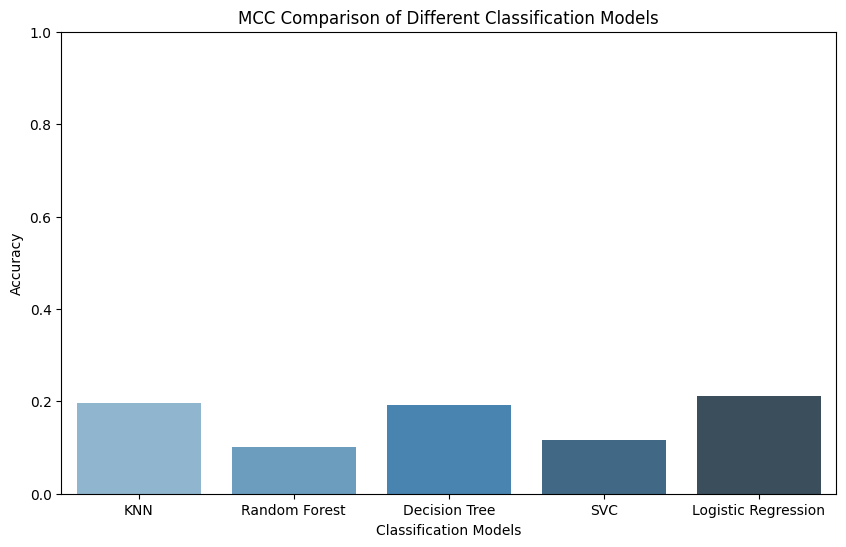

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

mcc_log = matthews_corrcoef(y_test, y_pred_logreg)
mcc_svc = matthews_corrcoef(y_test, y_pred_svc)
mcc_tree = matthews_corrcoef(y_test, y_pred_tree)
mcc_rf = matthews_corrcoef(y_test, y_pred_forest)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)

# Create a DataFrame with the results
mcc_data = {
    "Model": ["KNN", "Random Forest", "Decision Tree", "SVC", "Logistic Regression"],
    "MCC": [mcc_knn, mcc_rf, mcc_tree, mcc_svc, mcc_log]
}

mcc_df = pd.DataFrame(mcc_data)  # Seaborn library expects a dataframe as input

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MCC", data=mcc_df, palette="Blues_d")
plt.title('MCC Comparison of Different Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1 for better visualization
plt.show()

## Random Forest performs best. Let's see if we can improve the model over or undersampling the original dataset

### Random oversampling the minority class


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you have your features and target set up
X = data.iloc[:, 1:]  # Features
y = data["Diabetes_binary"]  # Target

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

X_train

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
51457      1.0       1.0        1.0  35.0     0.0     0.0   
104586     1.0       1.0        1.0  37.0     1.0     0.0   
135715     0.0       0.0        1.0  28.0     0.0     0.0   
229271     0.0       0.0        1.0  23.0     0.0     0.0   
107891     0.0       0.0        1.0  30.0     1.0     0.0   
...        ...       ...        ...   ...     ...     ...   
119879     1.0       0.0        1.0  45.0     1.0     0.0   
103694     1.0       1.0        1.0  29.0     1.0     0.0   
131932     0.0       1.0        1.0  25.0     0.0     0.0   
146867     0.0       0.0        0.0  23.0     0.0     0.0   
121958     1.0       0.0        1.0  35.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
51457                    0.0           1.0     1.0      1.0  ...   
104586                   0.0           1.0     1.0      1.0  ...   
135715                   0.0           1.0     1.0      1.0  ...   
229271                   0.0           1.0     1.0      1.0  ...   
107891                   0.0           1.0     0.0      1.0  ...   
...                      ...           ...     ...      ...  ...   
119879                   0.0           1.0     1.0      0.0  ...   
103694                   0.0           1.0     0.0      1.0  ...   
131932                   0.0           1.0     1.0      1.0  ...   
146867                   0.0           0.0     1.0      1.0  ...   
121958                   0.0           0.0     1.0      1.0  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
51457             1.0          0.0      5.0       0.0      14.0       1.0   
104586            1.0          0.0      3.0       0.0       2.0       0.0   
135715            1.0          0.0      2.0       0.0       0.0       0.0   
229271            1.0          0.0      3.0       0.0       0.0       0.0   
107891            1.0          0.0      2.0       0.0       5.0       0.0   
...               ...          ...      ...       ...       ...       ...   
119879            1.0          1.0      1.0      15.0       0.0       0.0   
103694            1.0          0.0      3.0       0.0       0.0       0.0   
131932            1.0          0.0      2.0       0.0       3.0       0.0   
146867            1.0          1.0      2.0       0.0       0.0       0.0   
121958            1.0          0.0      3.0      15.0       0.0       1.0   

        Sex   Age  Education  Income  
51457   0.0  12.0        3.0     1.0  
104586  1.0  11.0        5.0     3.0  
135715  0.0   5.0        6.0     8.0  
229271  1.0   2.0        6.0     8.0  
107891  1.0   7.0        4.0     7.0  
...     ...   ...        ...     ...  
119879  0.0   5.0        4.0     1.0  
103694  1.0  11.0        6.0     7.0  
131932  0.0   9.0        6.0     8.0  
146867  0.0   5.0        6.0     6.0  
121958  0.0  11.0        5.0     6.0  

[177576 rows x 21 columns]

In [42]:
X_train.shape

(177576, 21)

In [43]:
# Separate the majority and minority classes
X_no_diabetes_majority_class_train = X_train[y_train == 0]
X_diabetes_minority_class_train = X_train[y_train == 1]

In [44]:
print(X_no_diabetes_majority_class_train.shape)
print(X_diabetes_minority_class_train.shape)

(152729, 21)
(24847, 21)


In [45]:
# Upsample minority class
X_diabetes_minority_class_upsampled_train = resample(X_diabetes_minority_class_train,
                          replace=True,  # sample with replacement
                          n_samples=len(X_no_diabetes_majority_class_train),  # match number in majority class
                          random_state=42)  # reproducible results

X_diabetes_minority_class_upsampled_train

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
213614     1.0       1.0        1.0  40.0     0.0     0.0   
55033      1.0       1.0        1.0  27.0     1.0     0.0   
186625     1.0       0.0        1.0  30.0     1.0     0.0   
25423      0.0       0.0        1.0  29.0     0.0     0.0   
148640     1.0       1.0        1.0  33.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
145507     1.0       1.0        1.0  25.0     0.0     0.0   
4283       1.0       1.0        1.0  24.0     0.0     0.0   
80805      0.0       1.0        1.0  27.0     1.0     0.0   
526        1.0       1.0        1.0  27.0     0.0     0.0   
75742      1.0       1.0        1.0  30.0     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
213614                   0.0           0.0     0.0      0.0  ...   
55033                    0.0           1.0     0.0      1.0  ...   
186625                   0.0           1.0     0.0      0.0  ...   
25423                    0.0           1.0     1.0      0.0  ...   
148640                   0.0           0.0     0.0      1.0  ...   
...                      ...           ...     ...      ...  ...   
145507                   1.0           0.0     1.0      1.0  ...   
4283                     0.0           1.0     0.0      1.0  ...   
80805                    1.0           0.0     0.0      1.0  ...   
526                      1.0           1.0     1.0      1.0  ...   
75742                    0.0           0.0     0.0      1.0  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
213614            1.0          0.0      4.0       2.0       0.0       0.0   
55033             1.0          0.0      3.0       0.0       6.0       0.0   
186625            1.0          0.0      2.0       1.0       0.0       0.0   
25423             1.0          0.0      2.0       0.0       0.0       0.0   
148640            1.0          0.0      4.0       0.0       7.0       0.0   
...               ...          ...      ...       ...       ...       ...   
145507            1.0          0.0      2.0       0.0       2.0       0.0   
4283              1.0          0.0      1.0       0.0       0.0       0.0   
80805             1.0          0.0      4.0       0.0       2.0       0.0   
526               1.0          0.0      3.0       0.0       0.0       0.0   
75742             1.0          0.0      4.0       0.0      30.0       0.0   

        Sex   Age  Education  Income  
213614  1.0   7.0        6.0     5.0  
55033   0.0   3.0        4.0     8.0  
186625  1.0  11.0        5.0     7.0  
25423   0.0   8.0        4.0     6.0  
148640  1.0  10.0        4.0     8.0  
...     ...   ...        ...     ...  
145507  1.0  13.0        6.0     6.0  
4283    0.0  11.0        6.0     7.0  
80805   0.0  12.0        4.0     2.0  
526     1.0  11.0        6.0     8.0  
75742   1.0   8.0        4.0     7.0  

[152729 rows x 21 columns]

In [46]:
print(X_no_diabetes_majority_class_train.shape)
print(X_diabetes_minority_class_upsampled_train.shape)

(152729, 21)
(152729, 21)


In [47]:

# Combine majority class with upsampled minority class
X_train_resampled = pd.concat([X_no_diabetes_majority_class_train, X_diabetes_minority_class_upsampled_train])
y_train_resampled = pd.concat([y_train[y_train == 0], pd.Series([1] * len(X_diabetes_minority_class_upsampled_train))])


Random Forest Accuracy:  0.8434116472195943
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     65605
         1.0       0.41      0.31      0.35     10499

    accuracy                           0.84     76104
   macro avg       0.65      0.62      0.63     76104
weighted avg       0.83      0.84      0.83     76104

[[60949  4656]
 [ 7261  3238]]


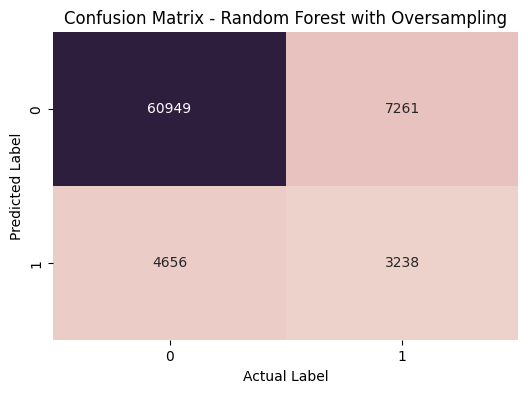

Matthews Correlation Coefficient (MCC):  0.26854926187351413


In [48]:

# Train the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_forest = random_forest.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy: ", acc_rf)
print(classification_report(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))

plot_confusion_matrix(y_test, y_pred_forest, "Random Forest with Oversampling")

# Calculate MCC
mcc_rf = matthews_corrcoef(y_test, y_pred_forest)
print("Matthews Correlation Coefficient (MCC): ", mcc_rf)

### Another way of Oversampling: using Imblearn

Random Forest Accuracy:  0.8433722274781877
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     65605
         1.0       0.41      0.31      0.36     10499

    accuracy                           0.84     76104
   macro avg       0.65      0.62      0.63     76104
weighted avg       0.83      0.84      0.83     76104

[[60886  4719]
 [ 7201  3298]]


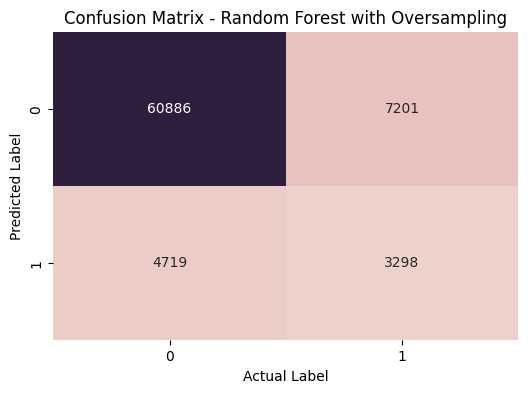

Matthews Correlation Coefficient (MCC):  0.27206267439216897


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from imblearn.over_sampling import RandomOverSampler  # Importing RandomOverSampler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# From the original dataset
X = data.iloc[:, 1:]  # Features
y = data["Diabetes_binary"]  # Target

# Step 1: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


# Step 2: Apply Random Over Sampling form imblearn library
oversampler = RandomOverSampler(random_state=42)  # Use RandomOverSampler
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 3: Train the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

# Step 4: Predictions
y_pred_forest = random_forest.predict(X_test)

# Step 5: Evaluation
acc_rf = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy: ", acc_rf)
print(classification_report(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))

# Step 6: Plot confusion matrix
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_pred, y_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Predicted Label')
    plt.xlabel('Actual Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_forest, "Random Forest with Oversampling")

# Step 7: Calculate and print MCC
mcc_rf = matthews_corrcoef(y_test, y_pred_forest)
print("Matthews Correlation Coefficient (MCC): ", mcc_rf)

###  UNDERSAMPLING: Let's see if undersampling the lowest class, the model improves

Random Forest Accuracy:  0.7065463050562388
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.80     65333
         1.0       0.29      0.77      0.43     10771

    accuracy                           0.71     76104
   macro avg       0.62      0.73      0.61     76104
weighted avg       0.86      0.71      0.75     76104

[[45463 19870]
 [ 2463  8308]]


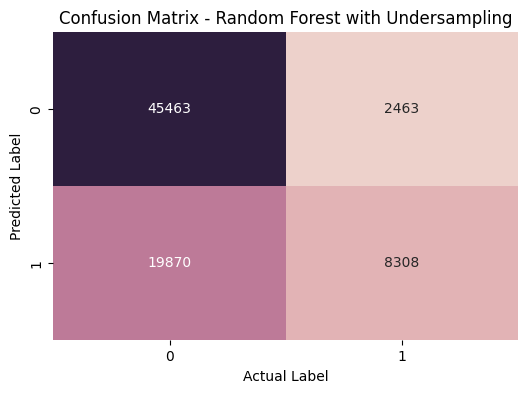

Matthews Correlation Coefficient (MCC):  0.33725077716410995


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Assuming you have your features and target set up
X = data.iloc[:, 1:]  # Features
y = data["Diabetes_binary"]  # Target

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48, shuffle=True)

# Apply Random Under Sampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_forest = random_forest.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy: ", acc_rf)
print(classification_report(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))

plot_confusion_matrix(y_test, y_pred_forest, "Random Forest with Undersampling")

# Step 7: Calculate and print MCC
mcc_rf = matthews_corrcoef(y_test, y_pred_forest)
print("Matthews Correlation Coefficient (MCC): ", mcc_rf)

### Use the weight class balance

`RandomForestClassifier(class_weight='balanced', random_state=42)`

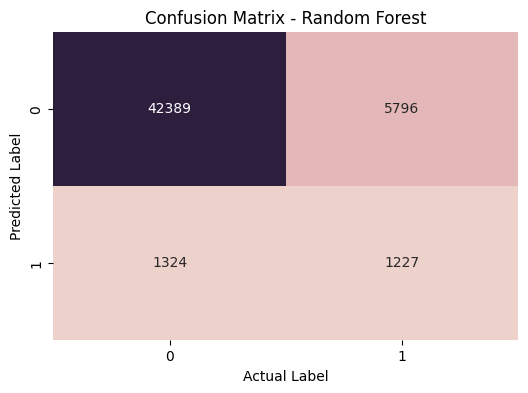

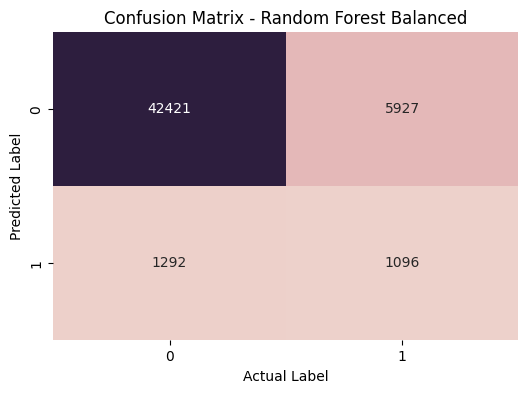

Matthews Correlation Coefficient (MCC):  0.2282403425937073
Matthews Correlation Coefficient (MCC) Balanced:  0.20628062415629517


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Assuming you have your features and target set up
X = data.iloc[:, 1:]  # Features
y = data["Diabetes_binary"]  # Target

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1990, shuffle=True)


# Train the Random Forest Classifier
random_forest_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)
random_forest_balanced.fit(X_train, y_train)

# Predictions
y_pred_forest = random_forest.predict(X_test)
y_pred_forest_balanced = random_forest_balanced.predict(X_test)

# Evaluation

plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")
plot_confusion_matrix(y_test, y_pred_forest_balanced, "Random Forest Balanced")

# Step 7: Calculate and print MCC
mcc_rf = matthews_corrcoef(y_test, y_pred_forest)
mcc_rf_balanced = matthews_corrcoef(y_test, y_pred_forest_balanced)
print("Matthews Correlation Coefficient (MCC): ", mcc_rf)
print("Matthews Correlation Coefficient (MCC) Balanced: ", mcc_rf_balanced)

## Let's try moving the threshold for logistic regression

In [52]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('data/S4_diabetes_desequilibrio_clases.csv')

X = data.iloc[:, 1:]
y = data["Diabetes_binary"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Get predicted probabilities
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability for the positive class


In [53]:
y_proba

array([0.05530572, 0.2589585 , 0.01365313, ..., 0.02747976, 0.06866334,
       0.11574027])

Here, a custom threshold of 0.2 is set. This means that any sample with a predicted probability of at least 0.2 will be classified as class 1, and samples with predicted probabilities below 0.2 will be classified as class 0.

`.astype(int)`:

The ``.astype(int)`` method converts the boolean array (``True/False``) into an integer array (``1/0``). In Python, ``True`` is equivalent to ``1`` and ``False``is equivalent to ``0``.

Custom Threshold Logistic Regression Accuracy:  0.7819037107116578
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86     65605
         1.0       0.34      0.64      0.45     10499

    accuracy                           0.78     76104
   macro avg       0.64      0.72      0.66     76104
weighted avg       0.85      0.78      0.81     76104

[[52821 12784]
 [ 3814  6685]]


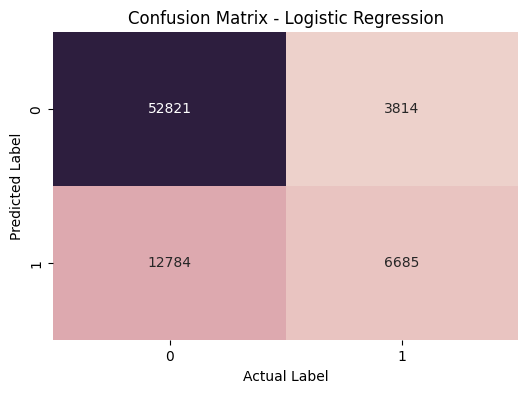

In [54]:

# Set a custom threshold
threshold = 0.2  # Example threshold
y_pred_custom_threshold = (y_proba >= threshold).astype(int)

# Evaluation with custom threshold
print("Custom Threshold Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_custom_threshold))
print(classification_report(y_test, y_pred_custom_threshold))
print(confusion_matrix(y_test, y_pred_custom_threshold))

plot_confusion_matrix(y_test, y_pred_custom_threshold, "Logistic Regression")

In [55]:
y_pred_custom_threshold

array([0, 1, 0, ..., 0, 0, 0])